# 2nd Session

# importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Iris.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

# slitting data into x and y

In [3]:
x = df.iloc[:,1:5]
Y = df.iloc[:,5]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# finding best features

# using chi2 and kbest

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [5]:
kbest = SelectKBest(score_func=chi2, k='all')
best_features = kbest.fit(x,Y)
dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(x.columns)
feature_scores = pd.concat([dfcolumns, dfscores], axis = 1)
feature_scores.columns = ['Specs', 'Score']

print(feature_scores)

           Specs       Score
0  SepalLengthCm   10.817821
1   SepalWidthCm    3.594499
2  PetalLengthCm  116.169847
3   PetalWidthCm   67.244828


# using extratrees

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

In [7]:
model = ExtraTreesClassifier()
model.fit(x, Y)
print(model.feature_importances_)

[0.09282268 0.04917963 0.43822453 0.41977316]


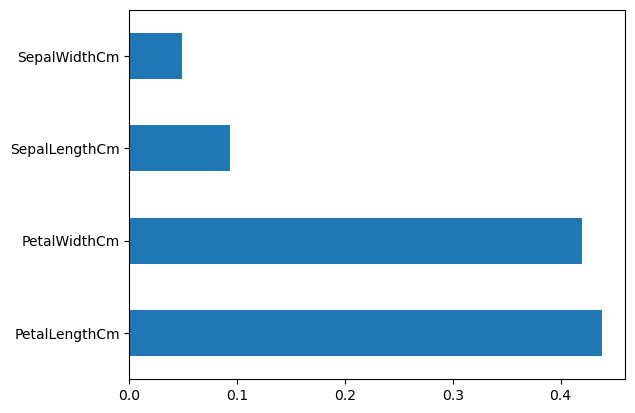

In [8]:
feat_importance = pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

# Converting numerical to categorical val
*do this when the data is mix of continuous and categorical

In [9]:
df['SepalLengthCm'] = pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm'] = pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm'] = pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm'] = pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

print(df)

      Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm         Species
0      1             0            1             0            0     Iris-setosa
1      2             0            1             0            0     Iris-setosa
2      3             0            1             0            0     Iris-setosa
3      4             0            1             0            0     Iris-setosa
4      5             0            1             0            0     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146             1            1             2            2  Iris-virginica
146  147             1            0             2            2  Iris-virginica
147  148             1            1             2            2  Iris-virginica
148  149             1            1             2            2  Iris-virginica
149  150             1            1             2            2  Iris-virginica

[150 rows x 6 columns]


# Converting categorical to numerical

In [10]:
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
df['Species'] = l1.fit_transform(df['Species'])
print(df['Species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


# dealing with missing values
*isnull - check for blank and nan
*fillna - fils blank and nan
df['column_name'].fillna((df['col_name'].mean()/.median()/.mode()),inplace = true) //for numerical data
df['col_name'].fillna(('Medium'),inplace = true) // for categorical data

*replace - for the egde cases
df.replace("back","dos"))

In [11]:
import pandas as pd
df_tp = pd.read_csv("Iris2.csv")
df_tp.isnull().sum()
print(df_tp)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            NaN           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
125  146            6.7           3.0            5.2           2.3   
126  147            6.3           2.5            5.0           1.9   
127  148            6.5           3.0            5.2           2.0   
128  149            6.2           3.4            5.4           2.3   
129  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
125  

In [12]:
df_tp['SepalLengthCm'].fillna((df_tp['SepalLengthCm'].mean()),inplace = True)
df_tp['PetalLengthCm'].fillna((df_tp['PetalLengthCm'].mean()),inplace = True)
df_tp['PetalWidthCm'].fillna((df_tp['PetalWidthCm'].mean()),inplace = True) 

df_tp.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# handling class imbalance
-random under and over sampling
-smote over sampling

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [14]:
df_tp['Species'].value_counts()


Iris-virginica     46
Iris-setosa        44
Iris-versicolor    40
Name: Species, dtype: int64

In [29]:
ros = RandomOverSampler(random_state = 0)
x1 = df_tp.iloc[:,1:5]
Y1 = df_tp.iloc[:,5]
print("before: ")
print(Y1.value_counts())
x_over, Y_over = ros.fit_resample(x1,Y1)
print("after: ")
print(Y_over.value_counts())

before: 
Iris-virginica     46
Iris-setosa        44
Iris-versicolor    40
Name: Species, dtype: int64
after: 
Iris-setosa        46
Iris-versicolor    46
Iris-virginica     46
Name: Species, dtype: int64
